In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_data = datasets.MNIST('data', True, transforms.ToTensor(), download=True)
test_data = datasets.MNIST('data', False, transforms.ToTensor(), download=True)
batch_size = 64
train_dl = DataLoader(train_data,batch_size,True)
test_dl = DataLoader(test_data,batch_size)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


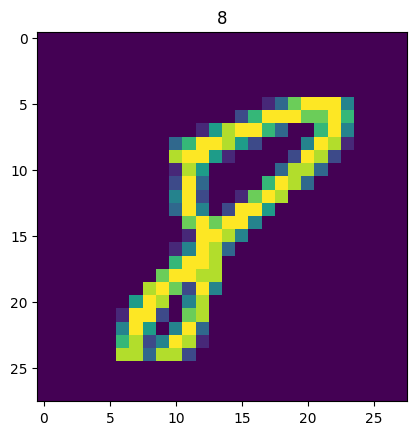

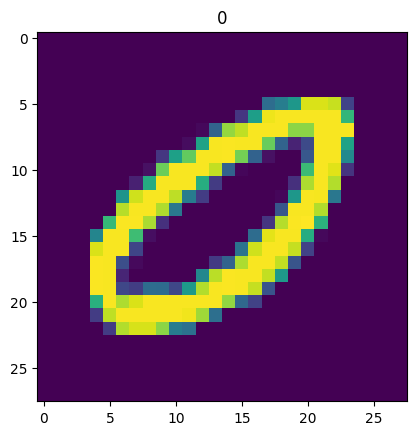

In [12]:
import matplotlib.pyplot as plt

for X,y in train_dl:
    print(set([yi.item() for yi in y]))
    for i in range(X.size(0) >> 5):
        plt.imshow(X[i][0])
        plt.title(y[i].item())
        plt.show()
    break

In [13]:
from torch import nn,optim
import torch

model = nn.Sequential(
    nn.Linear(28*28, 64,True),
    nn.Sigmoid(),
    nn.Linear(64, 64, True),
    nn.Sigmoid(),
    nn.Linear(64, 10, True)
)
loss_fn = nn.CrossEntropyLoss()


In [14]:
def train(epoch, lr):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for i in range(epoch):
        for X, y in train_dl:
            output = model(X.reshape(-1, 28*28))
            loss = loss_fn(output, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'\repoch: {i}, loss: {loss.item()}', end='')
        print()


def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_dl:
            output = model(X.reshape(-1, 28*28))
            _, argmax = torch.max(output, 1)
            total += y.size(0)
            correct += (argmax == y).sum().item()
    print(f'正确率 {correct} / {total}')


for i in range(6):
    train(5, 5e-3)
    test()


epoch: 0, loss: 2.3047325611114595
epoch: 1, loss: 2.2869565486907967
epoch: 2, loss: 2.2889842987060547
epoch: 3, loss: 2.2794075012207037
epoch: 4, loss: 2.2869040966033936
正确率 1270 / 10000
epoch: 0, loss: 2.2938287258148193
epoch: 1, loss: 2.2622201442718506
epoch: 2, loss: 2.2838819026947027
epoch: 3, loss: 2.2354667186737067
epoch: 4, loss: 2.2242712974548343
正确率 3411 / 10000
epoch: 0, loss: 2.1946930885314948
epoch: 1, loss: 2.0465440750122075
epoch: 2, loss: 2.1038632392883353
epoch: 3, loss: 1.8673727512359625
epoch: 4, loss: 1.8005076646804814
正确率 4392 / 10000
epoch: 0, loss: 1.7388192415237427
epoch: 1, loss: 1.5738514661788945
epoch: 2, loss: 1.3244659900665283
epoch: 3, loss: 1.4108631610870361
epoch: 4, loss: 1.2725180387496948
正确率 5896 / 10000
epoch: 0, loss: 1.1539939641952515
epoch: 1, loss: 0.9453584551811218
epoch: 2, loss: 0.9986827373504639
epoch: 3, loss: 1.0464222431182861
epoch: 4, loss: 0.8047657012939453
正确率 6889 / 10000
epoch: 0, loss: 0.8824821710586548
epoch

In [15]:
# 隐藏层激活函数使用ReLU
model = nn.Sequential(
    nn.Linear(28*28, 64,True),
    nn.Sigmoid(),
    nn.Linear(64, 64, True),
    nn.ReLU(),
    nn.Linear(64, 10, True)
)

for i in range(6):
    train(5, 5e-3)
    test()

epoch: 0, loss: 2.2812139987945557
epoch: 1, loss: 2.2534313201904297
epoch: 2, loss: 2.1674571037292482
epoch: 3, loss: 1.7578495740890503
epoch: 4, loss: 1.3698283433914185
正确率 5819 / 10000
epoch: 0, loss: 1.3011499643325806
epoch: 1, loss: 1.0931437015533447
epoch: 2, loss: 0.6004559397697449
epoch: 3, loss: 0.5602261424064636
epoch: 4, loss: 0.59611654281616217
正确率 8222 / 10000
epoch: 0, loss: 0.43982237577438354
epoch: 1, loss: 0.38924810290336615
epoch: 2, loss: 0.72536092996597296
epoch: 3, loss: 0.42767459154129036
epoch: 4, loss: 0.49757006764411926
正确率 8750 / 10000
epoch: 0, loss: 0.36491698026657104
epoch: 1, loss: 0.27801254391670227
epoch: 2, loss: 0.36962303519248965
epoch: 3, loss: 0.26441928744316126
epoch: 4, loss: 0.37094068527221684
正确率 8936 / 10000
epoch: 0, loss: 0.55563837289810185
epoch: 1, loss: 0.42263993620872566
epoch: 2, loss: 0.20216822624206543
epoch: 3, loss: 0.38704183697700597
epoch: 4, loss: 0.29360988736152652
正确率 9026 / 10000
epoch: 0, loss: 0.343165